In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc
from PIL import Image
import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [341]:
file_path = '전국전통시장표준데이터.csv'
market = pd.read_csv(file_path,encoding = 'cp949')

In [342]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시장명        1521 non-null   object 
 1   시장유형       1521 non-null   object 
 2   소재지도로명주소   1518 non-null   object 
 3   소재지지번주소    1521 non-null   object 
 4   시장개설주기     1521 non-null   object 
 5   위도         1521 non-null   float64
 6   경도         1521 non-null   float64
 7   점포수        1521 non-null   int64  
 8   취급품목       1521 non-null   object 
 9   사용가능상품권    108 non-null    object 
 10  홈페이지주소     103 non-null    object 
 11  공중화장실보유여부  1521 non-null   object 
 12  주차장보유여부    1521 non-null   object 
 13  개설연도       1502 non-null   object 
 14  전화번호       976 non-null    object 
 15  데이터기준일자    1521 non-null   object 
 16  제공기관코드     1521 non-null   object 
 17  제공기관명      1521 non-null   object 
dtypes: float64(2), int64(1), object(15)
memory usage: 214.0+ KB


In [343]:
market.shape

(1521, 18)

In [344]:
market.isnull().sum()

시장명             0
시장유형            0
소재지도로명주소        3
소재지지번주소         0
시장개설주기          0
위도              0
경도              0
점포수             0
취급품목            0
사용가능상품권      1413
홈페이지주소       1418
공중화장실보유여부       0
주차장보유여부         0
개설연도           19
전화번호          545
데이터기준일자         0
제공기관코드          0
제공기관명           0
dtype: int64

In [345]:
market.head()

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
0,용궁시장,상설장+5일장,경상북도 예천군 용궁면 용궁시장길 9,경상북도 예천군 용궁면 읍부리 329-3,4일+9일,36.607018,128.275372,30,농산물+축산물+가공식품+가정용품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
1,풍양시장,5일장,경상북도 예천군 풍양면 낙상2길 37-13,경상북도 예천군 풍양면 낙상리 157-7,3일+8일,36.509273,128.299805,48,농산물+축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
2,울진바지게시장,상설장+5일장,경상북도 울진군 울진읍 읍내2길 13-6,경상북도 울진군 울진읍 읍내리 63,2일+7일,36.991629,129.402070,252,농산물+축산물+수산물,NaN,NaN,Y,Y,2008,054-783-2988,2022-07-06,B553077,소상공인시장진흥공단
3,죽변시장,상설장+5일장,경상북도 울진군 죽변면 죽변중앙로 168-14,경상북도 울진군 죽변면 죽변리 36-8,3일+8일,37.058968,129.422254,64,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
4,평해시장,상설장+5일장,경상북도 울진군 평해읍 평해6길 12,경상북도 울진군 평해읍 평해리 879-3,2일+7일,36.726945,129.442436,29,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [346]:
market.tail()

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
1516,거제고현시장,상설장,경상남도 거제시 거제중앙로 1883-2,경상남도 거제시 고현동 98-27,매일,34.886258,128.623655,207,농산물+축산물+수산물+가공식품+기타소매업,NaN,NaN,Y,Y,1980,055-633-0533,2022-07-06,B553077,소상공인시장진흥공단
1517,신부시장,상설장,경상남도 거제시 신부로3길 9,경상남도 거제시 장승포동 283,매일,34.868113,128.730088,43,축산물+수산물+가공식품+음식점업+기타소매업,NaN,NaN,Y,Y,1997,055-682-2317,2022-07-06,B553077,소상공인시장진흥공단
1518,옥수동새시장,상설장,경상남도 거제시 능포로 136-2,경상남도 거제시 능포동 680-1,매일,34.875713,128.732108,43,축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1984,055-681-2370,2022-07-06,B553077,소상공인시장진흥공단
1519,옥수시장,상설장,경상남도 거제시 옥수로2길 10,경상남도 거제시 능포동 633-215,매일,34.875344,128.730873,43,농산물+수산물+가공식품+의류/신발+기타소매업,NaN,NaN,Y,Y,2006,NaN,2022-07-06,B553077,소상공인시장진흥공단
1520,옥포국제시장,상설장,경상남도 거제시 옥포대첩로3길 8,경상남도 거제시 옥포동 529-1,매일,34.893970,128.689238,115,농산물+축산물+수산물+가공식품+기타소매업,NaN,NaN,Y,Y,2006,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [347]:
market[market['소재지도로명주소'].isnull()]

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
267,덕하시장,상설장+5일장,NaN,울산광역시 울주군 청량읍 상남리 578,매일+5일,35.491440,129.305996,14,"농산물,식당,잡화류",온누리상품권,NaN,Y,Y,NaN,NaN,2020-10-15,6310000,울산광역시
407,안평,5일장,NaN,경상북도 의성군 안평면 박곡리 952-3,3일+8일,36.375455,128.579895,5,"마늘,고추.잡화류 등",NaN,https://www.usc.go.kr/tour/sights/detail.tc?/m...,Y,N,1922,054-830-6233,2020-06-30,5150000,경상북도 의성군
422,옥산,5일장,NaN,경상북도 의성군 옥산면 입암리 1105-85,3일+8일,36.401199,128.802413,5,농수산물류 등,NaN,https://www.usc.go.kr/tour/sights/detail.tc?/m...,Y,N,1958,054-830-6233,2020-06-30,5150000,경상북도 의성군


In [348]:
market[market['사용가능상품권'].isnull()]

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
0,용궁시장,상설장+5일장,경상북도 예천군 용궁면 용궁시장길 9,경상북도 예천군 용궁면 읍부리 329-3,4일+9일,36.607018,128.275372,30,농산물+축산물+가공식품+가정용품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
1,풍양시장,5일장,경상북도 예천군 풍양면 낙상2길 37-13,경상북도 예천군 풍양면 낙상리 157-7,3일+8일,36.509273,128.299805,48,농산물+축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
2,울진바지게시장,상설장+5일장,경상북도 울진군 울진읍 읍내2길 13-6,경상북도 울진군 울진읍 읍내리 63,2일+7일,36.991629,129.402070,252,농산물+축산물+수산물,NaN,NaN,Y,Y,2008,054-783-2988,2022-07-06,B553077,소상공인시장진흥공단
3,죽변시장,상설장+5일장,경상북도 울진군 죽변면 죽변중앙로 168-14,경상북도 울진군 죽변면 죽변리 36-8,3일+8일,37.058968,129.422254,64,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
4,평해시장,상설장+5일장,경상북도 울진군 평해읍 평해6길 12,경상북도 울진군 평해읍 평해리 879-3,2일+7일,36.726945,129.442436,29,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,거제고현시장,상설장,경상남도 거제시 거제중앙로 1883-2,경상남도 거제시 고현동 98-27,매일,34.886258,128.623655,207,농산물+축산물+수산물+가공식품+기타소매업,NaN,NaN,Y,Y,1980,055-633-0533,2022-07-06,B553077,소상공인시장진흥공단
1517,신부시장,상설장,경상남도 거제시 신부로3길 9,경상남도 거제시 장승포동 283,매일,34.868113,128.730088,43,축산물+수산물+가공식품+음식점업+기타소매업,NaN,NaN,Y,Y,1997,055-682-2317,2022-07-06,B553077,소상공인시장진흥공단
1518,옥수동새시장,상설장,경상남도 거제시 능포로 136-2,경상남도 거제시 능포동 680-1,매일,34.875713,128.732108,43,축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1984,055-681-2370,2022-07-06,B553077,소상공인시장진흥공단
1519,옥수시장,상설장,경상남도 거제시 옥수로2길 10,경상남도 거제시 능포동 633-215,매일,34.875344,128.730873,43,농산물+수산물+가공식품+의류/신발+기타소매업,NaN,NaN,Y,Y,2006,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [349]:
market[market['홈페이지주소'].isnull()]

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
0,용궁시장,상설장+5일장,경상북도 예천군 용궁면 용궁시장길 9,경상북도 예천군 용궁면 읍부리 329-3,4일+9일,36.607018,128.275372,30,농산물+축산물+가공식품+가정용품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
1,풍양시장,5일장,경상북도 예천군 풍양면 낙상2길 37-13,경상북도 예천군 풍양면 낙상리 157-7,3일+8일,36.509273,128.299805,48,농산물+축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
2,울진바지게시장,상설장+5일장,경상북도 울진군 울진읍 읍내2길 13-6,경상북도 울진군 울진읍 읍내리 63,2일+7일,36.991629,129.402070,252,농산물+축산물+수산물,NaN,NaN,Y,Y,2008,054-783-2988,2022-07-06,B553077,소상공인시장진흥공단
3,죽변시장,상설장+5일장,경상북도 울진군 죽변면 죽변중앙로 168-14,경상북도 울진군 죽변면 죽변리 36-8,3일+8일,37.058968,129.422254,64,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
4,평해시장,상설장+5일장,경상북도 울진군 평해읍 평해6길 12,경상북도 울진군 평해읍 평해리 879-3,2일+7일,36.726945,129.442436,29,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,거제고현시장,상설장,경상남도 거제시 거제중앙로 1883-2,경상남도 거제시 고현동 98-27,매일,34.886258,128.623655,207,농산물+축산물+수산물+가공식품+기타소매업,NaN,NaN,Y,Y,1980,055-633-0533,2022-07-06,B553077,소상공인시장진흥공단
1517,신부시장,상설장,경상남도 거제시 신부로3길 9,경상남도 거제시 장승포동 283,매일,34.868113,128.730088,43,축산물+수산물+가공식품+음식점업+기타소매업,NaN,NaN,Y,Y,1997,055-682-2317,2022-07-06,B553077,소상공인시장진흥공단
1518,옥수동새시장,상설장,경상남도 거제시 능포로 136-2,경상남도 거제시 능포동 680-1,매일,34.875713,128.732108,43,축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1984,055-681-2370,2022-07-06,B553077,소상공인시장진흥공단
1519,옥수시장,상설장,경상남도 거제시 옥수로2길 10,경상남도 거제시 능포동 633-215,매일,34.875344,128.730873,43,농산물+수산물+가공식품+의류/신발+기타소매업,NaN,NaN,Y,Y,2006,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [350]:
market[market['개설연도'].isnull()]

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
267,덕하시장,상설장+5일장,NaN,울산광역시 울주군 청량읍 상남리 578,매일+5일,35.491440,129.305996,14,"농산물,식당,잡화류",온누리상품권,NaN,Y,Y,NaN,NaN,2020-10-15,6310000,울산광역시
349,반구시장,상설장,울산광역시 중구 반구정14길 13(반구동),울산광역시 중구 반구동 448-9,매일,35.558386,129.343420,153,"음식점, 주류, 잡화 등",온누리상품권+전자상품권,NaN,Y,Y,NaN,052-297-2387,2020-10-15,6310000,울산광역시
350,우정전통시장,상설장+5일장,울산광역시 중구 당산5길 9,울산광역시 중구 우정동 284-23,"매일+5일, 10일",35.554881,129.310051,75,"농수축산물, 식당, 생활잡화 등",온누리상품권,NaN,Y,N,NaN,052-248-0100,2020-10-15,6310000,울산광역시
351,울산시장,상설장,울산광역시 중구 구교로 35(학산동),울산광역시 중구 학산동 47-10,매일,35.555467,129.328409,297,"한복, 침구류, 그릇, 생선, 잡화 등",온누리상품권+전자상품권,NaN,Y,Y,NaN,052-296-1864,2020-10-15,6310000,울산광역시
352,성남프라자,상설장,울산광역시 중구 중앙3길6(성남동),울산광역시 중구 성남동 190-239,매일,35.554510,129.317536,70,"한복, 침구류, 잡화 등",온누리상품권+전자상품권,NaN,Y,Y,NaN,052-243-5678,2020-10-15,6310000,울산광역시
353,선우시장,상설장,울산광역시 중구 곽남14길 37(남외동),울산광역시 중구 남외동 385-3,매일,35.571190,129.342110,84,"농수축산물, 과일류, 반찬류, 생활잡화 등",온누리상품권+전자상품권,NaN,Y,N,NaN,NaN,2020-10-15,6310000,울산광역시
354,병영시장,상설장,울산광역시 중구 병영로 14(남외동),울산광역시 중구 남외동 257-1,매일,35.570565,129.346293,51,"농수산물, 과일류, 반찬류, 생활잡화 등",온누리상품권,NaN,Y,N,NaN,052-294-4929,2020-10-15,6310000,울산광역시
355,역전시장,상설장,울산광역시 중구 구역전길 14(학성동),울산광역시 중구 학성동 436-20,매일,35.556154,129.328480,36,농수산물,온누리상품권,NaN,Y,N,NaN,052-296-8323,2020-10-15,6310000,울산광역시
356,우정시장,상설장,울산광역시 중구 당산5길 10(우정동),울산광역시 중구 우정동 285-1,매일,35.554622,129.310073,15,의류 등,온누리상품권,NaN,Y,N,NaN,052-243-0262,2020-10-15,6310000,울산광역시
357,학성종합시장,상설장,울산광역시 중구 새치로 28(학성동),울산광역시 중구 학성동 467-1,매일,35.554421,129.332058,9,"식료품, 식당, 잡화",NaN,NaN,Y,N,NaN,052-297-4354,2020-10-15,6310000,울산광역시


In [351]:
market[market['전화번호'].isnull()]

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
0,용궁시장,상설장+5일장,경상북도 예천군 용궁면 용궁시장길 9,경상북도 예천군 용궁면 읍부리 329-3,4일+9일,36.607018,128.275372,30,농산물+축산물+가공식품+가정용품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
1,풍양시장,5일장,경상북도 예천군 풍양면 낙상2길 37-13,경상북도 예천군 풍양면 낙상리 157-7,3일+8일,36.509273,128.299805,48,농산물+축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
3,죽변시장,상설장+5일장,경상북도 울진군 죽변면 죽변중앙로 168-14,경상북도 울진군 죽변면 죽변리 36-8,3일+8일,37.058968,129.422254,64,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
4,평해시장,상설장+5일장,경상북도 울진군 평해읍 평해6길 12,경상북도 울진군 평해읍 평해리 879-3,2일+7일,36.726945,129.442436,29,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
5,후포시장,상설장+5일장,경상북도 울진군 후포면 울진대게로 21,경상북도 울진군 후포면 삼율리 126,3일+8일,36.677876,129.444227,124,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,포항운하송림시장,상설장,경상북도 포항시 남구 운하로36번길 7,경상북도 포항시 남구 송도동 493-11,매일,36.028204,129.376312,48,수산물+가공식품+기타소매업,NaN,NaN,Y,N,2014,NaN,2022-07-06,B553077,소상공인시장진흥공단
1512,한라종합시장,상설장,경상북도 포항시 북구 대안길 57,경상북도 포항시 북구 용흥동 357-1,매일,36.041226,129.351271,40,농산물+수산물+가공식품+음식점업+기타소매업,NaN,NaN,Y,Y,2011,NaN,2022-07-06,B553077,소상공인시장진흥공단
1513,해도5(형산)시장,상설장,경상북도 포항시 남구 문예로70번길 23,경상북도 포항시 남구 해도동 209-1,매일,36.012702,129.366493,39,농산물+축산물+가공식품,NaN,NaN,Y,Y,1990,NaN,2022-07-06,B553077,소상공인시장진흥공단
1519,옥수시장,상설장,경상남도 거제시 옥수로2길 10,경상남도 거제시 능포동 633-215,매일,34.875344,128.730873,43,농산물+수산물+가공식품+의류/신발+기타소매업,NaN,NaN,Y,Y,2006,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [352]:
market.head()

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
0,용궁시장,상설장+5일장,경상북도 예천군 용궁면 용궁시장길 9,경상북도 예천군 용궁면 읍부리 329-3,4일+9일,36.607018,128.275372,30,농산물+축산물+가공식품+가정용품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
1,풍양시장,5일장,경상북도 예천군 풍양면 낙상2길 37-13,경상북도 예천군 풍양면 낙상리 157-7,3일+8일,36.509273,128.299805,48,농산물+축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
2,울진바지게시장,상설장+5일장,경상북도 울진군 울진읍 읍내2길 13-6,경상북도 울진군 울진읍 읍내리 63,2일+7일,36.991629,129.402070,252,농산물+축산물+수산물,NaN,NaN,Y,Y,2008,054-783-2988,2022-07-06,B553077,소상공인시장진흥공단
3,죽변시장,상설장+5일장,경상북도 울진군 죽변면 죽변중앙로 168-14,경상북도 울진군 죽변면 죽변리 36-8,3일+8일,37.058968,129.422254,64,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
4,평해시장,상설장+5일장,경상북도 울진군 평해읍 평해6길 12,경상북도 울진군 평해읍 평해리 879-3,2일+7일,36.726945,129.442436,29,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [353]:
market.dtypes

시장명           object
시장유형          object
소재지도로명주소      object
소재지지번주소       object
시장개설주기        object
위도           float64
경도           float64
점포수            int64
취급품목          object
사용가능상품권       object
홈페이지주소        object
공중화장실보유여부     object
주차장보유여부       object
개설연도          object
전화번호          object
데이터기준일자       object
제공기관코드        object
제공기관명         object
dtype: object

In [354]:
market_df = market.copy()

In [355]:
market_df.head()

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
0,용궁시장,상설장+5일장,경상북도 예천군 용궁면 용궁시장길 9,경상북도 예천군 용궁면 읍부리 329-3,4일+9일,36.607018,128.275372,30,농산물+축산물+가공식품+가정용품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
1,풍양시장,5일장,경상북도 예천군 풍양면 낙상2길 37-13,경상북도 예천군 풍양면 낙상리 157-7,3일+8일,36.509273,128.299805,48,농산물+축산물+가공식품+기타소매업,NaN,NaN,Y,Y,1999,NaN,2022-07-06,B553077,소상공인시장진흥공단
2,울진바지게시장,상설장+5일장,경상북도 울진군 울진읍 읍내2길 13-6,경상북도 울진군 울진읍 읍내리 63,2일+7일,36.991629,129.402070,252,농산물+축산물+수산물,NaN,NaN,Y,Y,2008,054-783-2988,2022-07-06,B553077,소상공인시장진흥공단
3,죽변시장,상설장+5일장,경상북도 울진군 죽변면 죽변중앙로 168-14,경상북도 울진군 죽변면 죽변리 36-8,3일+8일,37.058968,129.422254,64,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단
4,평해시장,상설장+5일장,경상북도 울진군 평해읍 평해6길 12,경상북도 울진군 평해읍 평해리 879-3,2일+7일,36.726945,129.442436,29,농산물+축산물+수산물,NaN,NaN,Y,Y,2007,NaN,2022-07-06,B553077,소상공인시장진흥공단


In [356]:
market_df.isnull().sum()

시장명             0
시장유형            0
소재지도로명주소        3
소재지지번주소         0
시장개설주기          0
위도              0
경도              0
점포수             0
취급품목            0
사용가능상품권      1413
홈페이지주소       1418
공중화장실보유여부       0
주차장보유여부         0
개설연도           19
전화번호          545
데이터기준일자         0
제공기관코드          0
제공기관명           0
dtype: int64

In [357]:
market_df = market_df.dropna(axis=0,subset = ['개설연도'])

In [358]:
market_df.isnull().sum()

시장명             0
시장유형            0
소재지도로명주소        2
소재지지번주소         0
시장개설주기          0
위도              0
경도              0
점포수             0
취급품목            0
사용가능상품권      1412
홈페이지주소       1399
공중화장실보유여부       0
주차장보유여부         0
개설연도            0
전화번호          541
데이터기준일자         0
제공기관코드          0
제공기관명           0
dtype: int64

In [382]:
market_df.loc[market_df['개설연도']== '1935-12-15', :]

,시장명,시장유형,소재지도로명주소,소재지지번주소,시장개설주기,위도,경도,점포수,취급품목,사용가능상품권,홈페이지주소,공중화장실보유여부,주차장보유여부,개설연도,전화번호,데이터기준일자,제공기관코드,제공기관명
1168,남양시장,상설장,화성시 남양시장로 61 일원,화성시 남양읍 남양리 1165-25 일원,"상설 및 1,6일장",37.209531,126.817209,434,"농축산물, 공산품","지역화폐, 온누리상품권",bamk.co.kr,Y,Y,1935-12-15,031-366-9100,2020-09-10,5530000,경기도 화성시


In [370]:
market_df.iloc[1168,13] ='1935'

In [371]:
market_df.iloc[1169,13] = '1929'

In [372]:
market_df.iloc[1170,13] = '1921'

In [373]:
market_df.iloc[1171,13] = '1929'

In [388]:
#market_df['개설연도'] = market_df['개설연도'].astype('int')

In [396]:
start_year = market_df['개설연도'].value_counts()
start_year = start_year.sort_values(ascending = True)

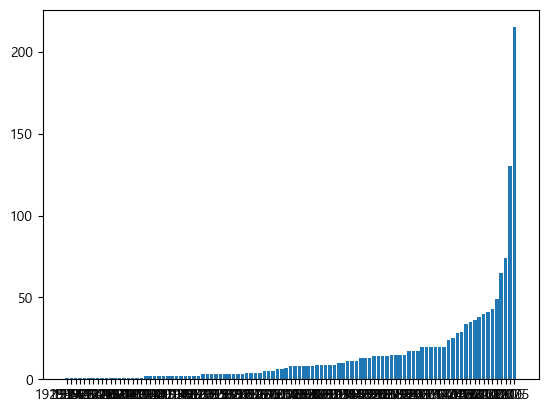

In [397]:
plt.bar(start_year.index, start_year.values)

plt.show()

In [392]:
latitude = market['위도']
longitude = market['경도']
ytick = range(33,39)
xtick = range(125,132)

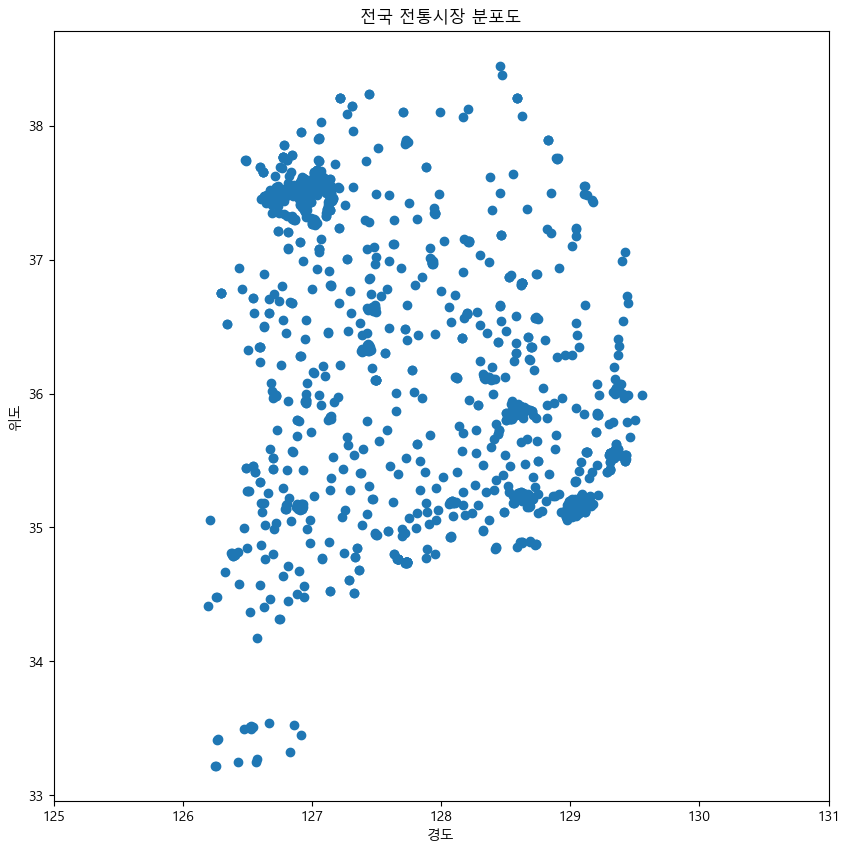

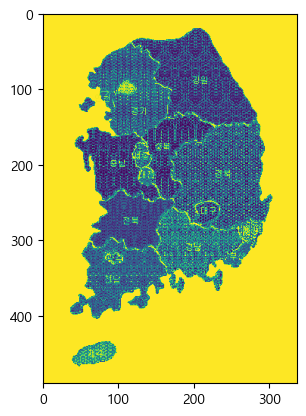

In [398]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(y = latitude, x = longitude)
plt.ylabel('위도')
plt.xlabel('경도')
plt.title('전국 전통시장 분포도')
plt.xticks(xtick)
plt.yticks(ytick)
plt.show()
ax2 = fig.add_subplot(1,2,1)
img = Image.open('C:/_img/map_00.gif')
img = np.array(img)
plt.imshow(img)